## Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

## Connect Data

In [2]:
df = pd.read_csv("../data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## SVD (non standardizing)

In [63]:
x = df.iloc[:, 1:] # extract only features (remove label) to apply dimentionality reductions
x.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


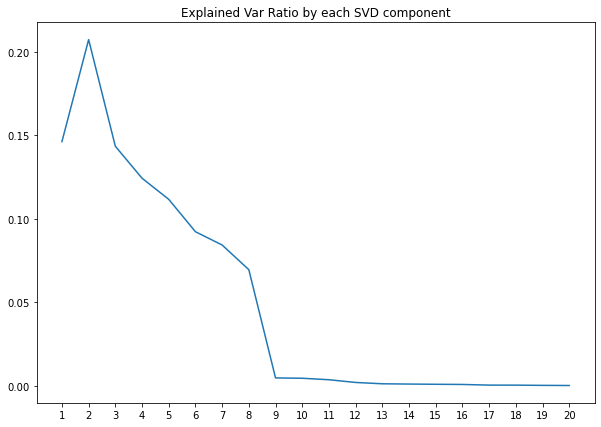

In [45]:
svd = TruncatedSVD(n_components=20).fit(x)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot([i+1 for i in range(20)], svd.explained_variance_ratio_)
ax.set_xticks([i+1 for i in range(20)])
ax.set_title("Explained Var Ratio by each SVD component")
plt.show()


In [52]:
# total % variance explained by 8 components
sum(svd.explained_variance_ratio_[:8])

0.9795352589894502

In [64]:
# apply svd transformation (8 components)
svd_x = TruncatedSVD(n_components=8).fit_transform(x)
svd_8 = pd.DataFrame(svd_x, columns=[f"axis{i+1}" for i in range(8)])
svd_8['Bankrupt'] = df['Bankrupt?']
svd_8.head()

,axis1,axis2,axis3,axis4,axis5,axis6,axis7,axis8,Bankrupt
0,5.995932e+09,2.565263e+09,1.998551e+09,-1.556894e+09,-2.872628e+09,-1.131120e+09,-6.199528e+08,-3.087006e+09,1
1,1.046412e+10,-2.025294e+09,7.646973e+09,2.906900e+09,-1.599878e+09,-1.508080e+09,-2.054188e+08,-2.352258e+09,1
2,5.855594e+09,-2.207877e+09,-2.404231e+09,-1.810148e+09,-2.697782e+09,-1.499563e+09,1.818762e+09,-3.908349e+08,1
3,1.071762e+10,1.341745e+09,6.819712e+09,7.430153e+08,-4.009937e+09,2.112051e+09,7.794637e+09,4.507580e+09,1
4,9.244816e+09,7.462440e+09,-1.875104e+09,3.030693e+09,-2.042418e+09,-3.254255e+08,-3.596034e+08,2.267177e+09,1


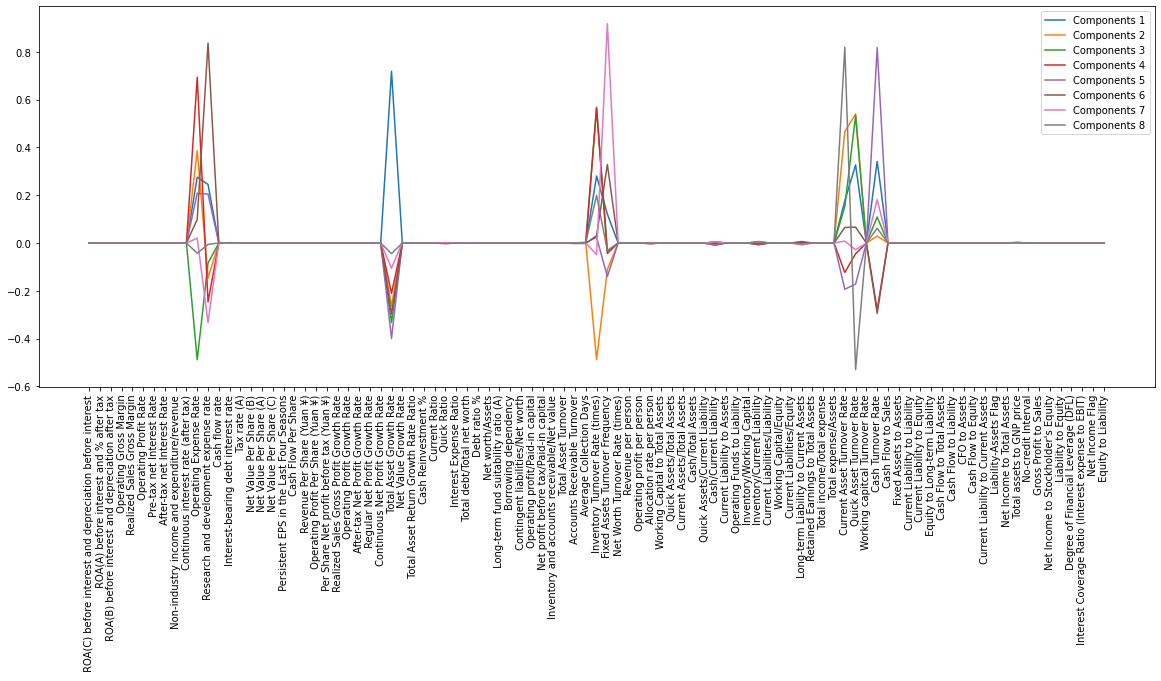

In [47]:
# check the components of SVD
components = svd.components_[:8,:]

fig, ax = plt.subplots(figsize=(20, 7))
for i in range(8):
    ax.plot(components[i,:], label=f"Components {i+1}")
ax.set_xticks([i for i in range(x.shape[1])])
ax.set_xticklabels(list(x.columns), rotation=90)
ax.legend()
plt.show()

## SVD (standardizing)

In [66]:
x = df.iloc[:, 1:] # extract only features (remove label) to apply dimentionality reductions
x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns) # standardize the data
x.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715


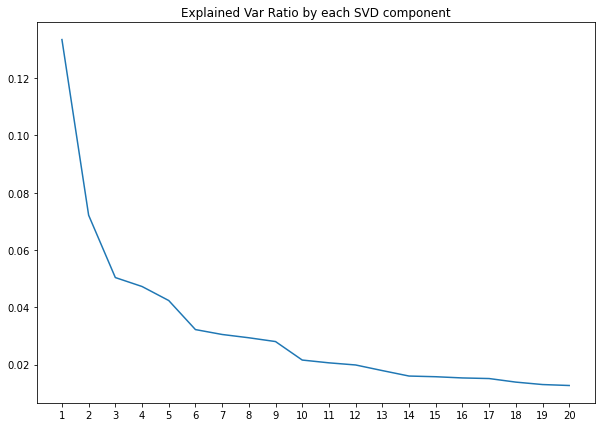

In [54]:
svd = TruncatedSVD(n_components=20).fit(x)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot([i+1 for i in range(20)], svd.explained_variance_ratio_)
ax.set_xticks([i+1 for i in range(20)])
ax.set_title("Explained Var Ratio by each SVD component")
plt.show()

In [56]:
# total % variance explained by 5 components
print(sum(svd.explained_variance_ratio_[:5]))
# total % variance explained by 9 components
print(sum(svd.explained_variance_ratio_[:9]))

0.34556615657552553
0.46562205063936996


In [67]:
# apply svd transformation (5 components)
svd_x = TruncatedSVD(n_components=5).fit_transform(x)
svd_z_5 = pd.DataFrame(svd_x, columns=[f"axis{i+1}" for i in range(5)])
svd_z_5['Bankrupt'] = df['Bankrupt?']
# apply svd transformation (9 components)
svd_x = TruncatedSVD(n_components=9).fit_transform(x)
svd_z_9 = pd.DataFrame(svd_x, columns=[f"axis{i+1}" for i in range(9)])
svd_z_9['Bankrupt'] = df['Bankrupt?']

## Load Data 

In [ ]:
svd_8.to_csv("svd_8.csv")
svd_z_5.to_csv("svd_z_5.csv")
svd_z_9.to_csv("svd_z_9.csv")